SIS on Scale Free Network

In [5]:
import collections
import random
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.utils import powerlaw_sequence   # to create power law degree sequence

# random number generator
from datetime import datetime
random.seed(datetime.now())

Create Scale-free graph

graph has 1000 nodes and 3226 edges


Text(0.5, 1.0, 'degree distribution')

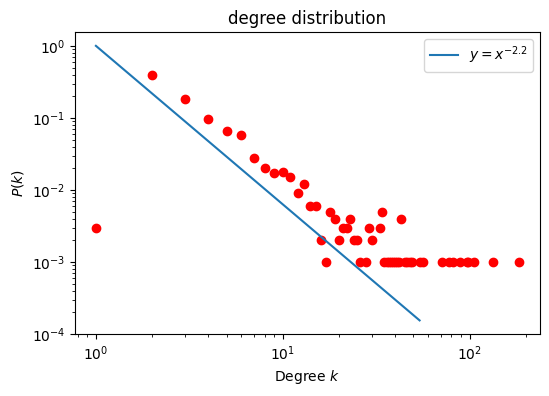

In [6]:
num_nodes = 1000  # number of nodes
exp = 2.2         # exponent of power law distribution

# random power law degree sequence
sequence = []
while len(sequence) < num_nodes:
    nextval = int(powerlaw_sequence(1, exp)[0])
    # we throw away nodes with degree more than num_nodes/2
    # also we set min degree to 2. because this methods creates too many parallel edges
    # that we need to remove
    if 2 <= nextval <= (num_nodes // 2):
        sequence.append(nextval)

# sum of degrees must even
if sum(sequence) % 2 == 1:
    sequence[0] += 1

# create multigraph
graph = nx.configuration_model(sequence)
# remove parallel edges
graph = nx.Graph(graph)
# remove self loops
loops = nx.selfloop_edges(graph)
graph.remove_edges_from(loops)

# get largest connected component
largest_cc = max(nx.connected_components(graph), key=len)
graph = graph.subgraph(largest_cc).copy()

print("graph has {0:d} nodes and {1:d} edges".format(nx.number_of_nodes(graph),
                                                     nx.number_of_edges(graph)))

# plot degree distribution
degree_list = [graph.degree(n) for n in graph]
degreeCount = collections.Counter(degree_list)
degree, counts = zip(*degreeCount.items())
plt.figure(num=None, dpi=100, facecolor='w', edgecolor='k')
plt.plot(degree, np.array(counts) / num_nodes, 'ro')

# plot y = x^(-exp) to compare it to our data
x = np.arange(1, len(counts))
label = ("$y = x^{{{}}}$").format(-exp)
plt.plot(x, np.power(x, -exp), label=label)

# set axis to log-log
plt.xlabel(r"Degree $k$")
plt.xscale("log")
plt.ylabel(r"$P(k)$")
plt.yscale("log")
plt.legend(loc="best")
plt.title(r"degree distribution")

a) Plot fractions of infected and susceptible nodes in terms of time
for infection rate  𝛽=0.1  and recovery rate  𝜇=1

In [7]:
import EoN

rho = 0.05 #initial fraction infected
target_k = 6
N=1000
beta = 0.1 #transmission rate per edge(infection)
gamma = 1 #recovery rate per node
tmax = 200

G = graph
iterations = 5
for counter in range(iterations):
    t, S, I = EoN.fast_SIS(G, beta, gamma, rho=rho, tmax = 200)
    if counter == 0:
        plt.plot(t, S, color = 'G', alpha=0.3, label='susceptible')
        plt.plot(t, I, color = 'R', alpha=0.3, label='infected')
    plt.plot(t, S, color = 'G', alpha=0.3)
    plt.plot(t, I, color = 'R', alpha=0.3)

#Now compare with ODE predictions.  Read in the degree distribution of G
#and use rho to initialize the various model equations.
#There are versions of these functions that allow you to specify the
#initial conditions rather than starting from a graph.

#we expect a homogeneous model to perform poorly because the degree
#distribution is very heterogeneous
# t, S, I = EoN.SIS_homogeneous_pairwise_from_graph(G, tau, gamma, rho=rho, tmax = tmax)
# plt.plot(t, I, '-.', label = 'Homogeneous pairwise', linewidth = 5)

# t, S, I = EoN.SIS_heterogeneous_meanfield_from_graph(G, tau, gamma, rho=rho, tmax=tmax)
# plt.plot(t, I, ':', label = 'Heterogeneous meanfield', linewidth = 5)

# t, S, I = EoN.SIS_compact_pairwise_from_graph(G, tau, gamma, rho=rho, tmax=tmax)
# plt.plot(t, I, '--', label = 'Compact pairwise', linewidth = 5)
plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.legend()
plt.savefig('SIS_BA_model_vs_sim.png')

ModuleNotFoundError: No module named 'EoN'

b) Find the fraction of infected nodes at the stationary state

In [7]:
# list of number of infected nodes in last 30 iterations
list_num_inf =[]
for i in range(-30, 0):
    list_num_inf.append(I[i])# list of number of infected nodes in last 30 iterations
list_num_inf = np.array(list_num_inf)

# list of fraction of infected nodes in last 30 iterations
list_frac_inf = np.divide(list_num_inf, N)

# mean and standard deviation of (fraction of infected nodes) in last 30 iterations
# standard deviation is used as a measure of fluctuations in stationary state
mean_inf = np.mean(list_frac_inf)
fluctuation_inf = np.std(list_frac_inf, axis=0)

print("farction of infected nodes at stationary state is: {0:.5f}".format(mean_inf))
print("with standard deviation: {0:.5f}".format(fluctuation_inf))




farction of infected nodes at stationary state is: 0.15597
with standard deviation: 0.00185


c) plot the stationary value of infected nodes in terms of beta

Text(0, 0.5, 'fraction infected at stationary')

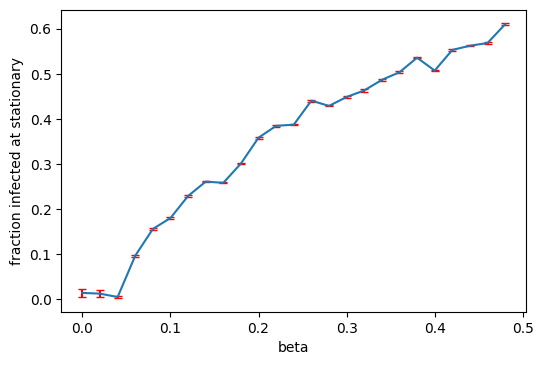

In [8]:
range_beta = np.arange(0.0, 0.5, 0.02)
inf_vs_beta = []    # inf fraction vs beta
fluctuation_vs_beta =[]

for beta in range_beta:
    G = graph
    t, S, I = EoN.fast_SIS(G, beta, gamma, rho=rho, tmax = 200)

    # list of number of infected node#Sadeq_Esamilzade_ends in last 30 iterations
    list_num_inf = []
    for i in range(-30, 0):
        list_num_inf.append(I[i])
    list_num_inf = np.array(list_num_inf)

    # list of fraction of infected nodes in last 30 iterations
    list_frac_inf = np.divide(list_num_inf, N)

    # mean and standard deviation of (fraction of infected nodes) in last 30 iterations
    # standard deviation is used as a measure of fluctuations in stationary state
    mean_inf = np.mean(list_frac_inf)
    fluctuation_inf = np.std(list_frac_inf, axis=0)

    # add mean value to inf vs beta list
    inf_vs_beta.append(mean_inf)
    # add std value to error list
    fluctuation_vs_beta.append(fluctuation_inf)

# plot inf fraction vs beta with fluctuations
plt.figure(num=None, dpi=100, facecolor='w', edgecolor='k')
plt.errorbar(range_beta, inf_vs_beta , yerr=fluctuation_vs_beta, ecolor="red", capsize=3)
plt.xlabel(r"beta")
plt.ylabel(r"fraction infected at stationary")